In [1]:
# installing pytrends python package which acts as an unofficial Google Trends API
!pip install pytrends;

In [43]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
plt.style.use('ggplot')

In [16]:
# connect to Google
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=360)

In [146]:
keywords = ['TikTok', 'Snapchat', 'Twitter', 'Instagram']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 12-m',
     geo='US',
     gprop='')
df = pytrend.interest_over_time()
df = df.drop(labels=['isPartial'], axis='columns')

keywords = ['Coronavirus']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 12-m',
     geo='US',
     gprop='')
df2 = pytrend.interest_over_time()
df2 = df2.drop(labels=['isPartial'], axis='columns')


### According to the CDC, the first case of COVID-19 in the United States occured on January 14th, 2020.
#### Source: https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html

### Our data will have a range from January 14th, 2020 to April 1st, 2020.

In [147]:
print(df.tail())
df2.tail()

            TikTok  Snapchat  Twitter  Instagram
date                                            
2020-03-01      12        11       56         69
2020-03-08      12        12       68         69
2020-03-15      15        15       71         76
2020-03-22      20        16       66         89
2020-03-29      20        14       62         84


,Coronavirus
date,
2020-03-01,31
2020-03-08,75
2020-03-15,100
2020-03-22,75
2020-03-29,64


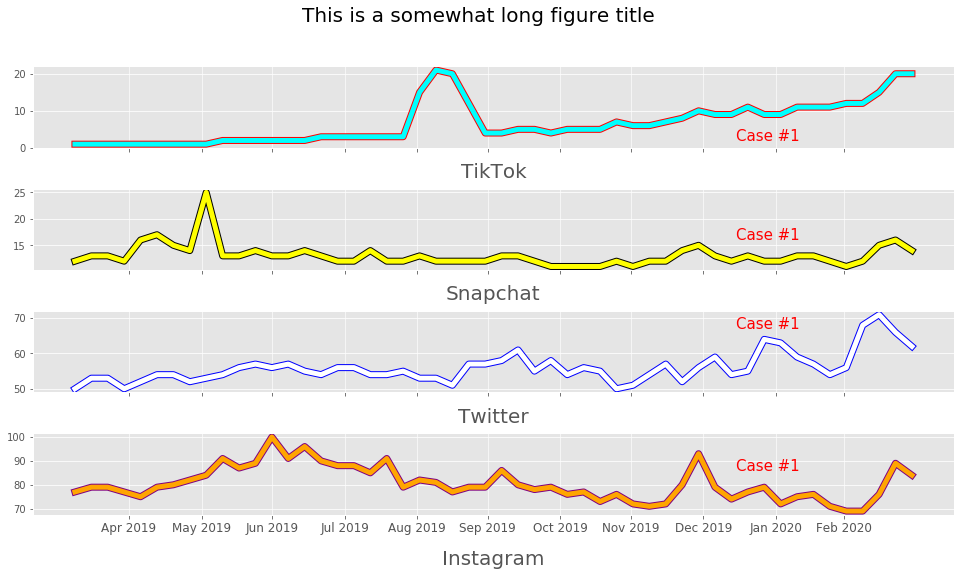

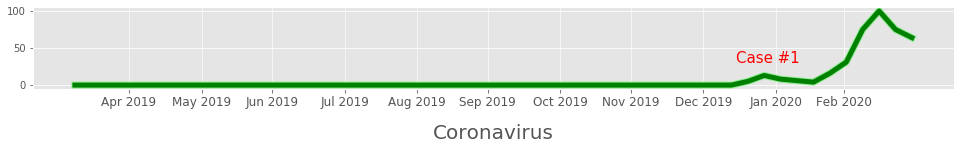

In [174]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(16.5,8.25), sharex=True)
ax1.plot(df.index, df['TikTok'], color='cyan', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='red'), pe.Normal()])
ax1.xaxis.grid(True,alpha=0.8)
ax1.set_xlabel('TikTok', fontsize=20, labelpad=15)

ax2.plot(df.index, df['Snapchat'], color='yellow', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
ax2.xaxis.grid(True,alpha=0.8)
ax2.set_xlabel('Snapchat', fontsize=20, labelpad=15)

ax3.plot(df.index, df['Twitter'], color='white', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='blue'), pe.Normal()])
ax3.xaxis.grid(True,alpha=0.8)
ax3.set_xlabel('Twitter', fontsize=20, labelpad=15)

ax4.plot(df.index, df['Instagram'], color='orange', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='purple'), pe.Normal()])
ax4.xaxis.grid(True,alpha=0.8)
ax4.set_xlabel('Instagram', fontsize=20, labelpad=15)

fig.suptitle('This is a somewhat long figure title', fontsize=20)
fig.subplots_adjust(hspace=.5)

xtick_dates = pd.date_range(start = df.index[0], end = df.index[-1], freq='1M')
plt.xticks(xtick_dates, [dtz.strftime('%b %Y') for dtz in xtick_dates], fontsize=12)


style = dict(size=15, color='red')
ax1.text(pd.to_datetime('2020-01-14'), 2, "Case #1", **style)
ax2.text(pd.to_datetime('2020-01-14'), 16, "Case #1", **style)
ax3.text(pd.to_datetime('2020-01-14'), 67, "Case #1", **style)
ax4.text(pd.to_datetime('2020-01-14'), 86, "Case #1", **style)

fig, (df2ax1) = plt.subplots(1, 1,figsize=(16.5,1.5))
df2ax1.plot(df.index, df2['Coronavirus'], color='green', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='lightgreen'), pe.Normal()])
df2ax1.xaxis.grid(True,alpha=0.8)
df2ax1.set_xlabel('Coronavirus', fontsize=20, labelpad=15)
df2ax1.text(pd.to_datetime('2020-01-14'), 30, "Case #1", **style)
xtick_dates2 = pd.date_range(start = df2.index[0], end = df2.index[-1], freq='1M')
plt.xticks(xtick_dates2, [dtz.strftime('%b %Y') for dtz in xtick_dates2], fontsize=12)

plt.show()

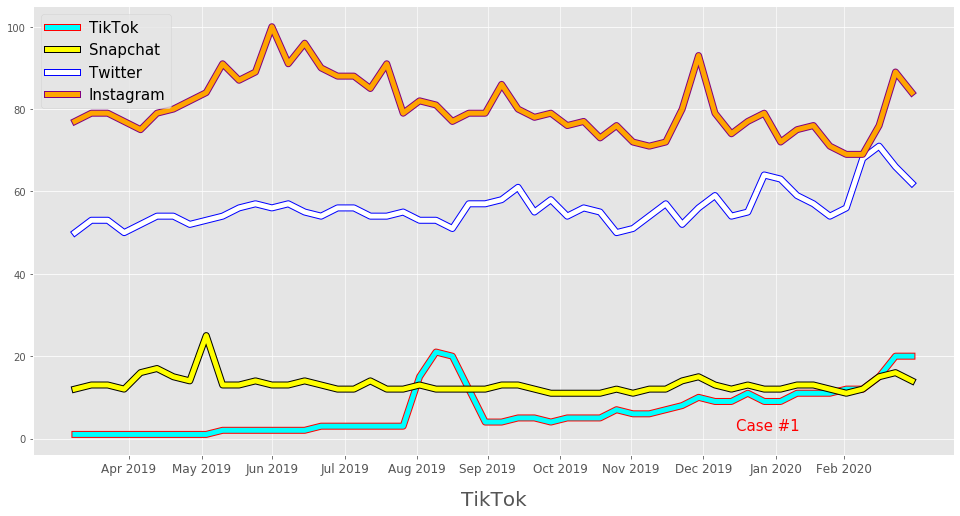

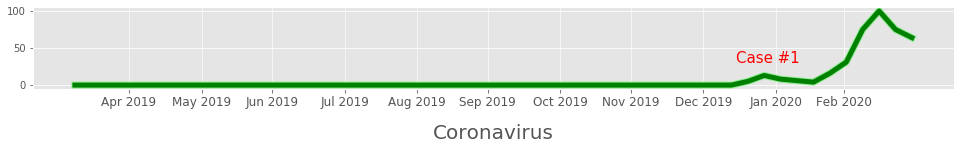

In [173]:
fig2, (ax1) = plt.subplots(1, 1,figsize=(16.5,8.25), sharex=True)
ax1.plot(df.index, df['TikTok'], color='cyan', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='red'), pe.Normal()])
ax1.plot(df.index, df['Snapchat'], color='yellow', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
ax1.plot(df.index, df['Twitter'], color='white', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='blue'), pe.Normal()])
ax1.plot(df.index, df['Instagram'], color='orange', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='purple'), pe.Normal()])
plt.legend(df, loc=2, prop={'size': 15})

ax1.xaxis.grid(True,alpha=.8)
ax1.set_xlabel('TikTok', fontsize=20, labelpad=15)
fig.suptitle('This is a somewhat long figure title', fontsize=20)
fig.subplots_adjust(hspace=.5)

xtick_dates = pd.date_range(start = df.index[0], end = df.index[-1], freq='1M')
plt.xticks(xtick_dates, [dtz.strftime('%b %Y') for dtz in xtick_dates], fontsize=12)

style = dict(size=15, color='red')
ax1.text(pd.to_datetime('2020-01-14'), 2, "Case #1", **style)

fig, (df2ax1) = plt.subplots(1, 1,figsize=(16.5,1.5))
df2ax1.plot(df.index, df2['Coronavirus'], color='green', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='lightgreen'), pe.Normal()])
df2ax1.xaxis.grid(True,alpha=0.8)
df2ax1.set_xlabel('Coronavirus', fontsize=20, labelpad=15)
df2ax1.text(pd.to_datetime('2020-01-14'), 30, "Case #1", **style)
xtick_dates2 = pd.date_range(start = df2.index[0], end = df2.index[-1], freq='1M')
plt.xticks(xtick_dates2, [dtz.strftime('%b %Y') for dtz in xtick_dates2], fontsize=12)

plt.show();